# **Applied Statistics Project: E-news Express**

## Description
### Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express believe that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to decide to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content compared to the old page. To test the effectiveness of the new landing page in gathering new subscribers, the Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?



## Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new or old
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - language chosen by the user to view the landing page

## **Initializing Project Code**

### Importing Libraries

In [1]:
#import required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

### Mounting Drive

In [2]:
#connecting drive for Google Colab
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/PGP: AIML University Of Texas/Assignment - E-news Express/abtest.csv'

# file_path = 'abtest.csv'

### Loading DataSet

In [3]:
# Read the CSV file
df = pd.read_csv(file_path)

## **Exploratory Data Analysis**

### Data Exploration


#### Checking few rows


In [4]:
print(df.head)

<bound method NDFrame.head of     user_id      group landing_page  time_spent_on_the_page converted  \
0    546592    control          old                    3.48        no   
1    546468  treatment          new                    7.13       yes   
2    546462  treatment          new                    4.40        no   
3    546567    control          old                    3.02        no   
4    546459  treatment          new                    4.75       yes   
..      ...        ...          ...                     ...       ...   
95   546446  treatment          new                    5.15        no   
96   546544    control          old                    6.52       yes   
97   546472  treatment          new                    7.07       yes   
98   546481  treatment          new                    6.20       yes   
99   546483  treatment          new                    5.86       yes   

   language_preferred  
0             Spanish  
1             English  
2             Spanish

#### Checking the shape of the dataset (Number of rows & columns)

In [5]:
print('Rows count =',df.shape[0],'\nColumns count =',df.shape[1])

Rows count = 100 
Columns count = 6


#### Checking the data types of the columns for the dataset

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB
None


**Observation** :
* Numerical columns: user_id, time_spent_on_the_page
* Categorical columns: group, landing page, converted and language_preferred

#### Checking null/missing values

In [7]:
print(df.isnull().sum())

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64


**Observation**: No missing values in dataset

#### Getting the statistical summary for the numerical variables

In [8]:
print(df.describe())

             user_id  time_spent_on_the_page
count     100.000000              100.000000
mean   546517.000000                5.377800
std        52.295779                2.378166
min    546443.000000                0.190000
25%    546467.750000                3.880000
50%    546492.500000                5.415000
75%    546567.250000                7.022500
max    546592.000000               10.710000


**Observations**:
* The average time spent on the page is about 5.38 minutes with a standard deviation of 2.38 minutes
* 50% of the entries spent less than 5.42 minutes on the page
* The minimum time spent on the page was 0.19 minutes and the maximum time spent on the page was 10.71 minutes

#### Getting the statistical summary for the categorical variables

In [9]:
print(df.describe(include = 'object'))

            group landing_page converted language_preferred
count         100          100       100                100
unique          2            2         2                  3
top     treatment          old       yes            Spanish
freq           50           50        54                 34


### Univariate Analysis

#### Column: Group

treatment    50
control      50
Name: group, dtype: int64


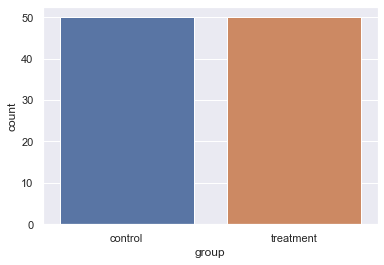

In [10]:
print(df['group'].value_counts())
sns.countplot(data=df,x='group')
plt.show()

**Observation**: The values of group columns are equally divided into "control" and "treatment" categories.

#### Column: time_spent_on_the_page

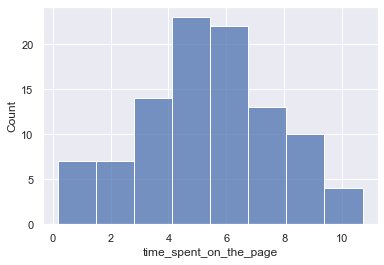

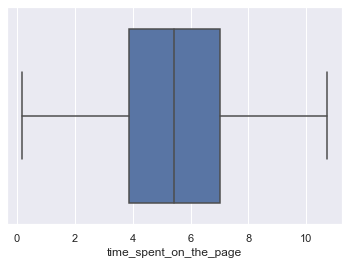

In [11]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

**Observation** : The values of "time_spent_on_the_page" column appears to be normally distributed and does not have outliers.

#### Column: Landing_page

old    50
new    50
Name: landing_page, dtype: int64


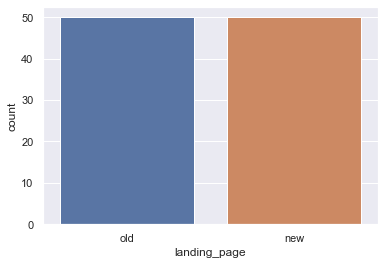

In [12]:
print(df['landing_page'].value_counts())
sns.countplot(data=df,x='landing_page')
plt.show()

**Observation**: The values of "landing_page" column are equally divided into "old" and "new" categories.

#### Column: Converted

yes    54
no     46
Name: converted, dtype: int64


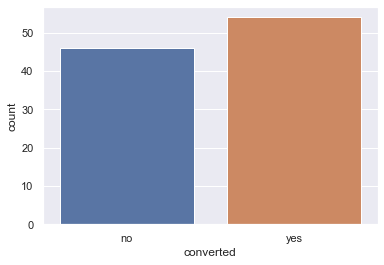

In [13]:
print(df['converted'].value_counts())
sns.countplot(data=df,x='converted')
plt.show()

**Observation** : There are more people who converted to the new landing page.

#### Column: Language_preferred

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


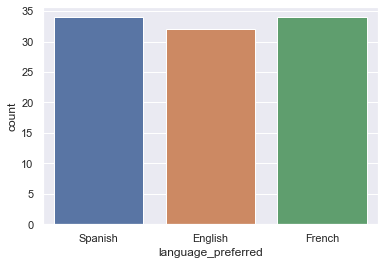

In [14]:
print(df['language_preferred'].value_counts())
sns.countplot(data=df,x='language_preferred')
plt.show()

### Bivariate/Multivariate Analysis


#### Columns: Landing_page and Time_spent_on_the_page

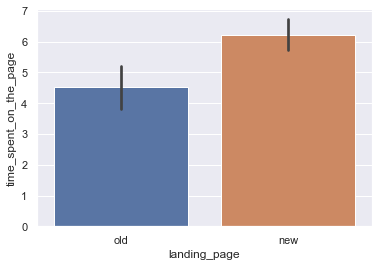

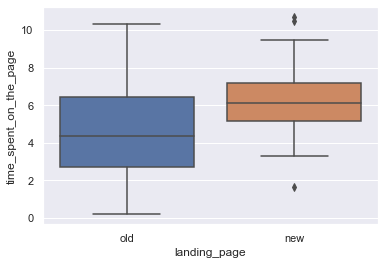

In [15]:
sns.barplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

#### Columns: Conversion_status and Time_spent_on_the_page

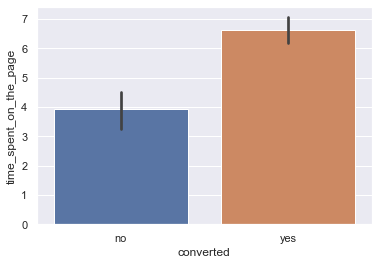

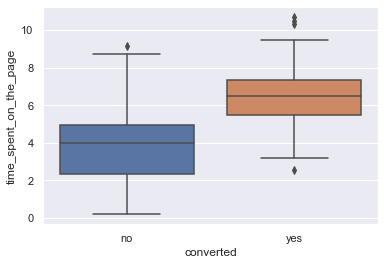

In [16]:
sns.barplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

**Observation**: The converted audience spend more time on the page.


#### Columns: Language_preferred and Time_spent_on_the_page

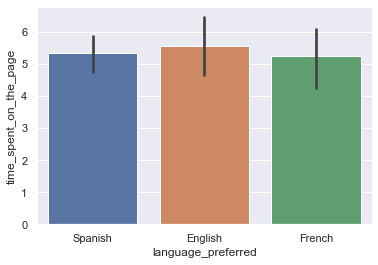

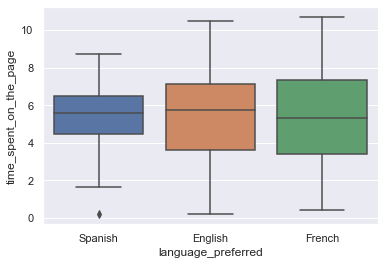

In [17]:
sns.barplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

#### Columns: Language_preferred, Conversion_status and Time_spent_on_the_page

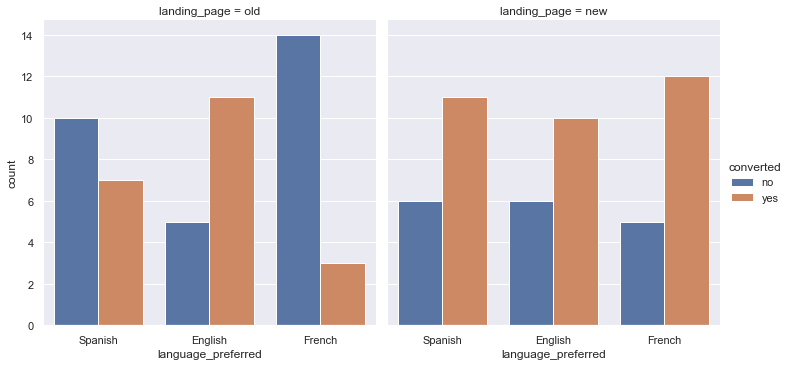

In [18]:
sns.catplot(data = df, x = 'language_preferred', hue = 'converted', col = 'landing_page', kind = 'count')

**Observation**: Users who preferred Spanish and French seemed less likely to convert to subscribers when they saw the old landing page. However, the new landing page saw conversions from users of all language preferences.

#### Columns: Group, Conversion_status and Time_spent_on_the_page

<AxesSubplot:xlabel='group', ylabel='time_spent_on_the_page'>

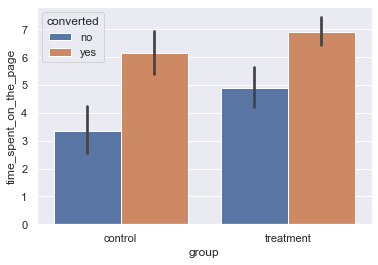

In [19]:
sns.barplot(data = df, x = 'group', y = 'time_spent_on_the_page', hue = 'converted')

**Observation**: More individuals converted to subscribers in the treatment group than in the control group. Furthermore, users in the treatment group spent more time on the page compared to participants in the control group.

## **Question 1: Do the users spend more time on the new landing page than the old landing page?**

### **Visual Analysis**

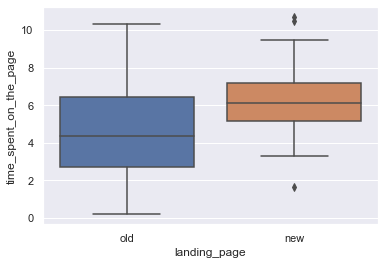

In [20]:
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

**Observations**: The average time spent on the new page seems greater than the old page.

### **Defining the null and alternate hypotheses**

**Null Hypothesis**: The mean time spent by users on the new page is equal to the mean time spent by users on the old page.

**Alternative Hypothesis**: The mean time spent by users on the new page is greater than the mean time spent by users on the old page.



### **Selecting Appropriate test**

This is a one-sided test comparing the means of two independent groups, where the standard deviations of the populations are not known. Given these conditions, **the most suitable approach would be to use a two-sample independent t-test**.

### **Calculating the p-value**

#### Given data and Assumptions before calculation

In [21]:
# Filtering data based on landing_page

spent_time_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
spent_time_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

print('The sample standard deviation of the time spent on the new page is:', round(spent_time_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(spent_time_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


**Assumptions for the Two-Sample Independent T-Test**:
1. Continuous Data - Yes, the duration spent on the pages is recorded on a continuous scale.
2. Normal Distribution of Populations - Yes, it is assumed that the populations follow a normal distribution.
3. Independence of Samples - Since we are drawing random samples from two separate groups, these samples come from independent populations.
4. Different Population Standard Deviations - Given that the sample standard deviations differ, the population standard deviations are also likely different.
5. Random Sampling - Yes, the samples are stated to be simple random samples from the respective populations.


**Note**: significance level has been assumed as 0.5

In [22]:
# Calculating p_value for Two-Sample Independence T-Test
from scipy.stats import ttest_ind

test_stat, p_value =  ttest_ind(spent_time_new, spent_time_old, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


In [23]:
if p_value < 0.05:
    print(f'Since the p-value {p_value} is below the significance threshold, we conclude that there is enough evidence to reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} exceeds the significance threshold, we do not have sufficient evidence to reject the null hypothesis.')

Since the p-value 0.0001392381225166549 is below the significance threshold, we conclude that there is enough evidence to reject the null hypothesis.


### **Draw inference**

**Since the p-value is much less than the level of significance of 5%, the null hypothesis is rejected. This means that there is significant evidence that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.**

## **Question 2: Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

### **Visual Analysis**

converted     no  yes
landing_page         
new           17   33
old           29   21


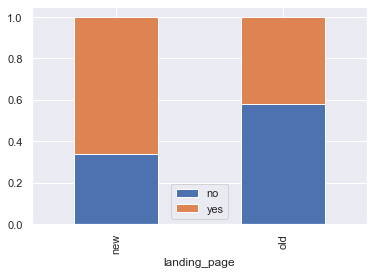

In [24]:
print(pd.crosstab(df['landing_page'],df['converted']))

# Visualize the proportion of the converted status depending on the landing page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar",stacked=True)
plt.legend()
plt.show()

**Observations**: The new landing page has shown a significant increase in user conversions compared to the older version.

### **Defining the null and alternate hypotheses**

$H_0:$ The conversion rate of the new page is equal to the conversion rate of the old page.

$H_a:$ The conversion rate of the new page is greater than the conversion rate of the old page.



### **Selecting Appropriate test**

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, a two sample z-test would be the most appropriate**.

### **Calculating the p-value**

#### Given data and Assumptions before calculation

In [25]:
# calculate the number of converted users in the treatment and control groups
new_converted = df[df['landing_page'] == 'new']['converted'].value_counts()['yes']
old_converted = df[df['landing_page'] == 'old']['converted'].value_counts()['yes']

#total number of users in the treatment and control groups
n_new = df.landing_page.value_counts()['new']
n_old = df.landing_page.value_counts()['old']

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_new, n_old ))

The numbers of users served the new and old pages are 50 and 50 respectively


**Two-proportion z-test assumptions**:

*   Binomally distributed population - Yes, a user is either converted or not converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes.:



**Note**: significance level has been assumed as 0.5

In [26]:
# Perform a two-proportion z-test and determine the p-value
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_new, n_old], alternative ='larger')

print('The p-value is', p_value)

The p-value is 0.008026308204056278


**Observation**: As the p-value (~0.008) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that conversion rate for the new landing page is higher than conversion rate for the old landing page.

### **Draw inference**

**Since the p-value is much less than the level of significance at 5%, the null hypothesis is rejected. This means that their is significant evidence that the conversion rate of the new page is greater than the conversion rate of the old page.**

## **Question 3: Does the converted status depend on the preferred language?**

### **Visual Analysis**

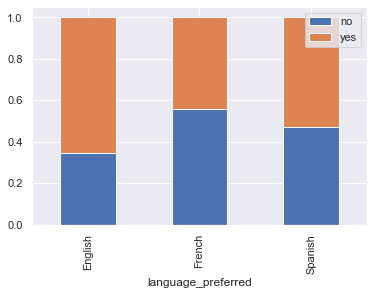

In [27]:
# Visualize the conversion status based on preferred language
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", stacked=True)
plt.legend()
plt.show()

### **Defining the null and alternate hypotheses**

$H_0:$ The converted status is independent of the preferred language.

$H_a:$ The converted status is dependent of the preferred language.

### **Selecting Appropriate test**

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, a chi-square test for independence would be the most approriate.**

### **Calculating the p-value**

#### Given data and Assumptions before calculation

In [28]:
# Create contingency table for the converted and language_preferred variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
print(contingency_table)


converted           no  yes
language_preferred         
English             11   21
French              19   15
Spanish             16   18


**Chi-Squared test for independence assumptions**:

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.



**Note**: significance level has been assumed as 0.5

#### Performing **Chi-squared test for independence**

In [29]:
# Perform a chi-squared test for independence and determine the p-value
from scipy.stats import chi2_contingency

chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

The p-value is 0.2129888748754345
As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### **Draw inference**

**As the p-value (~0.21) is more than the level of significance, we can not reject the null hypothesis. Hence, we do not have enough evidence to support the claim that conversion rate is dependent on the preferred language.**

## **Question 4: Is the mean time spent on the new page same for the different language users?**

### **Visual Analysis**

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


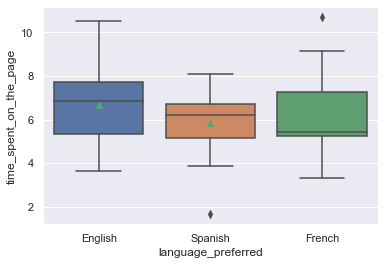

In [30]:
df_new = df[df['landing_page'] == 'new']

# calculate the mean time spent on the new page for different language users
print(df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean())

# Visualize the time spent on the new page for different language users
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

### **Defining the null and alternate hypotheses**

$H_0:$ The mean time spent on the new lading page is the same across all preferred langauges.

$H_a:$ At least one of the mean times spent on the new landing page is different amongst the preferred languages.


### **Selecting Appropriate test**

This is a problem, concerning three population means. **Based on this information, a one-way ANOVA test would be the most appropriate.**

### **Calculating the p-value**

#### Given data and Assumptions before calculation

In [31]:
# create new subsets for the time spent on the new page for each preferred language
spent_time_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
spent_time_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']
spent_time_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']

##### **Shapiro-Wilk’s test**
>$H_0:$ Carbon emission follows a normal distribution

>$H_a:$ Carbon emission does not follow a normal distribution

In [32]:
# perform the Shapiro-Wilk's test and get the p-value
from scipy import stats

w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


**Since p-value of the test is very large, we fail to reject the null hypothesis, meaning the response follows a normal distribution.**

**One-way ANOVA test assumptions**:

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.




**Note**: significance level has been assumed as 0.5

##### **Levene’s test**
>$H_0$: All the population variances are equal

>$H_a$: At least one variance is different from the rest

In [33]:
# perform the Levene's test and get the p-value
from scipy.stats import levene

statistic, p_value = stats.levene(df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


**Since the p-value is large, we fail to reject the null hypothesis, meaning the variances are equal.**

##### **One-way ANOVA test assumptions**:

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.




**Note**: significance level has been assumed as 0.5

#### Performing **One-way ANOVA test**

In [34]:
# Perform a one-way ANOVA test and determine the p-value
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(spent_time_English, spent_time_French, spent_time_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### **Draw inference**

**Since the p-value is greater than the level of significance at 5%, the null hypothesis fails to be rejected. This means that the mean time spent on the new landing page is relatively similar regardless of the preferred language.**

## **Conclusion and Business Recommendations**

###**Conclusions**:
* To determine if users spend more time on the new landing page compared to the existing one, a two-sample independent t-test was conducted. The test yielded a p-value of 0.0001, which is below the 5% significance level. This result leads us to reject the null hypothesis, indicating strong evidence that users spend significantly more time on the new page than on the old page.

* In assessing whether the conversion rate for the new page exceeds that of the old page, a two-proportion z-test was used. The resulting p-value of 0.008 is also less than the 5% significance level, leading to the rejection of the null hypothesis. This suggests substantial evidence that the new landing page has a higher conversion rate compared to the old page.

* A chi-square test for independence was performed to investigate the relationship between conversion status and preferred language. The p-value of 0.213 exceeded the 5% significance level, so we fail to reject the null hypothesis. This implies that conversion status and preferred language are independent of each other.

* To examine if the time spent on the new landing page varies with preferred language, a one-way ANOVA test was conducted. With a p-value of 0.432, which is above the 5% significance level, we fail to reject the null hypothesis. This indicates that the average time spent on the new landing page is similar across different preferred languages.



### **Recommendations**:
* E-News Express should fully implement the new landing page, as it attracts significantly more user engagement than the old one. The increased time spent on the new page suggests that it is favored by users.

* It may be prudent to phase out the old landing page, given its minimal impact on average time spent and conversion rate. The new landing page demonstrates a higher conversion rate, warranting increased resources and focus.

* Deploy the new landing page with all existing preferred languages, as there is no significant difference in average time spent across these languages. This ensures that conversion rates will be consistent. Additionally, consider adding more languages to the platform to broaden the audience reach.